In [62]:
import pandas as pd
import numpy as np
import seaborn as sb 
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import skew
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score, r2_score, f1_score,\
roc_auc_score,mean_absolute_error,mean_absolute_percentage_error,max_error

In [63]:
data_fin_imprt=pd.read_csv("final.csv",  delimiter=',')


In [64]:
data_fin_imprt

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,3.044522,4.955827,10.366309,6,1.791759,7.581210,1960,4.727388,6.461468,0.000000,...,False,False,False,True,False,False,False,False,True,False
1,3.044522,4.394449,9.360741,5,1.945910,7.581720,1961,0.000000,6.150603,4.976734,...,False,False,False,True,False,False,False,False,True,False
2,3.044522,4.406719,9.565775,6,1.945910,7.580189,1958,4.691348,6.828712,0.000000,...,False,False,False,True,False,False,False,False,True,False
3,3.044522,4.543295,9.320181,7,1.791759,7.585281,1968,0.000000,6.971669,0.000000,...,False,False,False,True,False,False,False,False,True,False
4,4.110874,4.317488,9.534668,5,1.791759,7.599902,1998,0.000000,6.674561,0.000000,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,4.394449,3.637586,8.979417,6,1.945910,7.593374,1984,0.000000,6.709304,0.000000,...,False,False,False,True,False,False,False,False,True,False
2926,3.044522,4.251699,9.092232,5,1.791759,7.592870,1983,0.000000,5.710427,5.783825,...,False,False,False,True,False,False,False,False,True,False
2927,4.454347,4.143135,9.253591,5,1.791759,7.597396,1992,0.000000,5.823046,0.000000,...,False,False,False,True,False,False,False,False,True,False
2928,3.044522,4.356709,9.211440,5,1.791759,7.588324,1975,0.000000,6.977281,4.820282,...,False,False,False,True,False,False,False,False,True,False


In [65]:

x=data_fin_imprt.drop('SalePrice',axis=1)
y=data_fin_imprt['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [66]:

lin_mod=LinearRegression()
lin_mod.fit(x_train,y_train)
lin_pred = lin_mod.predict(x_test)

In [67]:
lin_mod_sc=lin_mod.score(x_train,y_train)
print('Linear Regression Model Score  : ',round(lin_mod_sc,3))
r2=r2_score(y_test,lin_pred)# computing and displaying the R.Sq of the model
print('R Sq. Value : ',round(r2,2))
lin_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted R Sq. Value is : ', round(lin_adj_r2,3))
mean_sq=mean_squared_error(y_test,lin_pred)# computing and displaying the Mean square error of the model
print('Mean Square Error is : ', round(mean_sq,3))
lin_rmse=np.sqrt(mean_squared_error(y_test,lin_pred))
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, lin_pred)
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(lin_mod, x, y,scoring='r2', cv=5)
print("Accuracy :",round(scores_cvs.mean()*100,2),"%")

Linear Regression Model Score  :  0.935
R Sq. Value :  0.91
Adjusted R Sq. Value is :  0.899
Mean Square Error is :  0.017
Root Mean Square Error is :  0.13
Mean Absoulue Error is :  0.075
Accuracy : 87.54 %


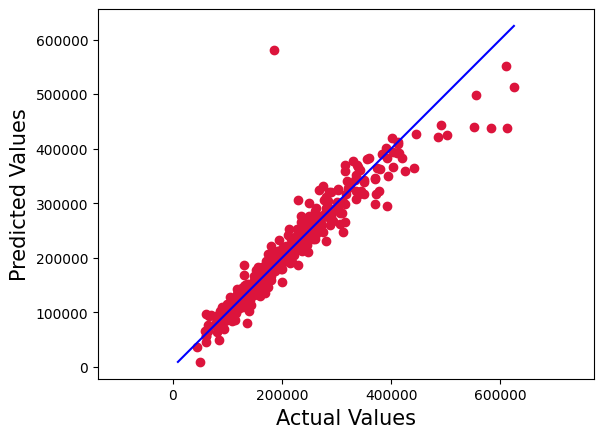

In [68]:
Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(lin_pred)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

C:\Users\revex\AppData\Local\Temp\ipykernel_13644\4269673852.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot((y_test-lin_pred),bins=100);


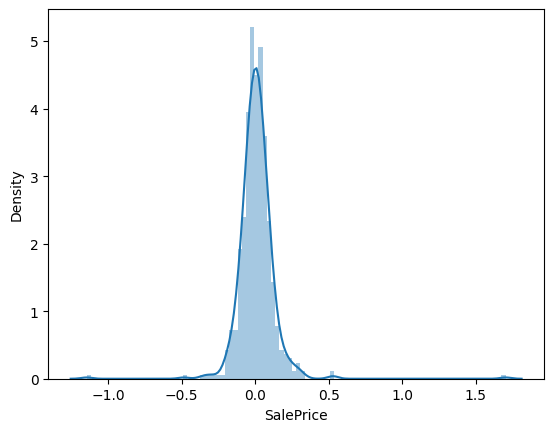

In [69]:
sb.distplot((y_test-lin_pred),bins=100); 

In [70]:
parameters = {'fit_intercept': [True, False], 'copy_X': [True, False]}

In [71]:
G_CV_lin = GridSearchCV(estimator=lin_mod, param_grid=parameters, cv= 5) #  using grid search method to optimise model with hyperparameter tuning

G_CV_lin.fit(x_train, y_train)# fitting the model
G_CV_lin.best_params_ # displaying optimised parameters for optimal tuning of model

{'copy_X': True, 'fit_intercept': True}

'copy_X': True, 'fit_intercept': True, 'normalize': False

In [72]:
lin_mod=LinearRegression(copy_X= True, fit_intercept= True)
lin_mod.fit(x_train,y_train)
lin_pred = lin_mod.predict(x_test)

In [73]:
lin_mod_sc=lin_mod.score(x_train,y_train)#best '1'
print('Linear Regression Model Score  : ',round(lin_mod_sc,3))
r2=r2_score(y_test,lin_pred)# computing and displaying the R.Sq of the model, best 'above0.9'
print('R Sq. Value : ',round(r2,2))
lin_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)#0.8+
print('Adjusted R Sq. Value is : ', round(lin_adj_r2,3))
mean_sq=mean_squared_error(y_test,lin_pred)# computing and displaying the Mean square error of the model, best 0
print('Mean Square Error is : ', round(mean_sq,3))
lin_rmse=np.sqrt(mean_squared_error(y_test,lin_pred))#best 0
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, lin_pred)#best 0
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(lin_mod, x, y,scoring='r2', cv=5) #best 100
print("Accuracy :",round(scores_cvs.mean()*100,2),"%") # Accuracy of moadel based on parameter supplied by GridsearchCV

Linear Regression Model Score  :  0.935
R Sq. Value :  0.91
Adjusted R Sq. Value is :  0.899
Mean Square Error is :  0.017
Root Mean Square Error is :  0.13
Mean Absoulue Error is :  0.075
Accuracy : 87.54 %


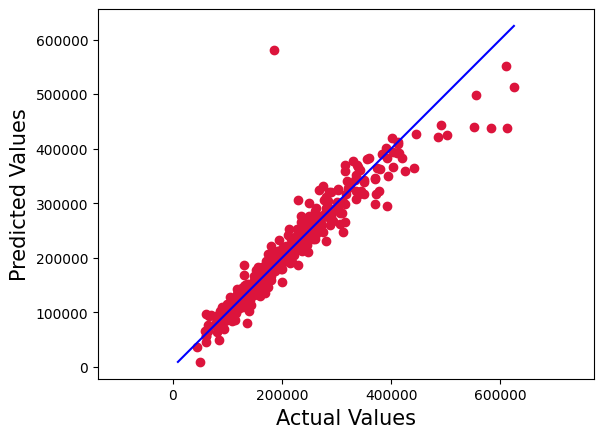

In [74]:
Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(lin_pred)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

C:\Users\revex\AppData\Local\Temp\ipykernel_13644\4269673852.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot((y_test-lin_pred),bins=100);


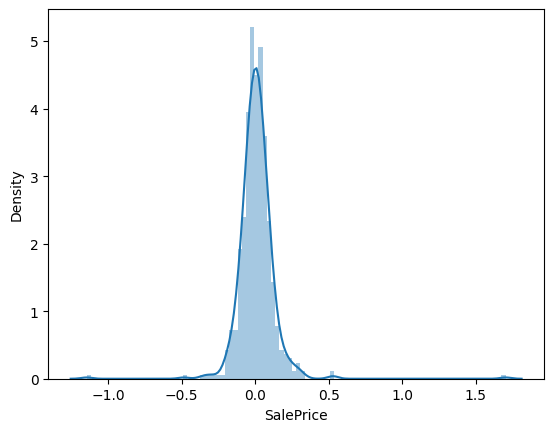

In [75]:
sb.distplot((y_test-lin_pred),bins=100); 